In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from tqdm import tqdm

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

music_data = pd.read_csv(
    '/Users/thinhpham/Learning/Master/HK_IV/IS/BTL/Music-Recommendation-using-Kmeans-KNN/music1K5_with_genre.csv'
)

music_data.head()

,track_id,artist,song,duration_ms,explicit,year,imageURL,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,1JiR4RJaZlbZ5b3HG8jkeL,Wizkid,Longtime (feat. Skepta),239893,True,2020,https://i.scdn.co/image/ab67616d0000b27390e89e...,51,0.850,0.660,11,-4.846,0,0.1690,0.4170,0.000051,0.2090,0.622,101.947,dancehall
1,6cfNBFSKFB59wO8xIFZ0qI,Ivan komarenko,Dom na wiślanym brzegu,209093,False,2010,https://i.scdn.co/image/ab67616d0000b273bd89a9...,15,0.640,0.758,9,-7.310,0,0.0675,0.4970,0.000000,0.0506,0.849,106.978,disco
2,5VcFzH97JEHgXgedErp4cP,Jayla Darden,Idea 686,163235,False,2018,https://i.scdn.co/image/ab67616d0000b2738a4b10...,55,0.712,0.347,0,-10.363,0,0.0410,0.3780,0.021200,0.1110,0.500,135.975,chill
3,7oMBY3VmIxqNVeZ7yneYuN,Various Artists,Me Voy Enamorando,235720,False,2022,https://i.scdn.co/image/ab67616d0000b27358067d...,0,0.686,0.912,10,-3.411,1,0.0685,0.0533,0.000000,0.3920,0.511,99.952,electro
4,3eDX2SnjVRG9hh0v074eEO,Various Artists,Christmas Without You,197146,False,2022,https://i.scdn.co/image/ab67616d0000b27389f796...,0,0.262,0.677,7,-5.645,1,0.0528,0.4470,0.000000,0.2050,0.365,207.478,piano


In [2]:
music_data.isnull().sum()

track_id            0
artist              0
song                0
duration_ms         0
explicit            0
year                0
imageURL            0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

In [3]:
print(music_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1495 entries, 0 to 1494
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          1495 non-null   object 
 1   artist            1495 non-null   object 
 2   song              1495 non-null   object 
 3   duration_ms       1495 non-null   int64  
 4   explicit          1495 non-null   bool   
 5   year              1495 non-null   int64  
 6   imageURL          1495 non-null   object 
 7   popularity        1495 non-null   int64  
 8   danceability      1495 non-null   float64
 9   energy            1495 non-null   float64
 10  key               1495 non-null   int64  
 11  loudness          1495 non-null   float64
 12  mode              1495 non-null   int64  
 13  speechiness       1495 non-null   float64
 14  acousticness      1495 non-null   float64
 15  instrumentalness  1495 non-null   float64
 16  liveness          1495 non-null   float64


In [4]:
print(music_data.shape)

(1495, 20)


# Plot of null values

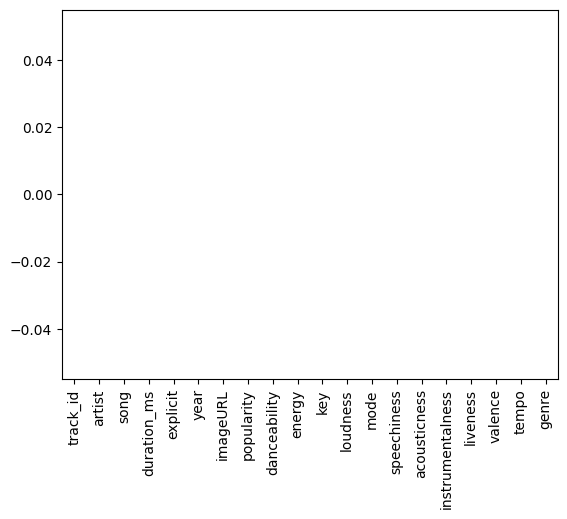

In [5]:
music_data.isnull().sum().plot.bar()
plt.show()

# Checking for numerical columns

In [6]:
music_data.select_dtypes(np.number)

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,239893,2020,51,0.850,0.660,11,-4.846,0,0.1690,0.41700,0.000051,0.2090,0.622,101.947
1,209093,2010,15,0.640,0.758,9,-7.310,0,0.0675,0.49700,0.000000,0.0506,0.849,106.978
2,163235,2018,55,0.712,0.347,0,-10.363,0,0.0410,0.37800,0.021200,0.1110,0.500,135.975
3,235720,2022,0,0.686,0.912,10,-3.411,1,0.0685,0.05330,0.000000,0.3920,0.511,99.952
4,197146,2022,0,0.262,0.677,7,-5.645,1,0.0528,0.44700,0.000000,0.2050,0.365,207.478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,691186,2009,31,0.652,0.478,7,-7.663,1,0.0553,0.96200,0.000024,0.7030,0.830,113.691
1491,364853,2022,0,0.591,0.569,9,-12.680,0,0.0468,0.39700,0.011100,0.1750,0.495,135.980
1492,151826,2022,0,0.587,0.876,4,-5.614,1,0.0684,0.24500,0.000000,0.3310,0.891,154.862
1493,151308,2018,50,0.728,0.573,6,-8.388,1,0.0347,0.00732,0.000000,0.1640,0.316,139.944


# Convert the explicit boolean column into 1s and 0s

In [7]:
music_data["explicit"] = music_data["explicit"].astype(int)

In [8]:
music_data.head()

,track_id,artist,song,duration_ms,explicit,year,imageURL,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,1JiR4RJaZlbZ5b3HG8jkeL,Wizkid,Longtime (feat. Skepta),239893,1,2020,https://i.scdn.co/image/ab67616d0000b27390e89e...,51,0.850,0.660,11,-4.846,0,0.1690,0.4170,0.000051,0.2090,0.622,101.947,dancehall
1,6cfNBFSKFB59wO8xIFZ0qI,Ivan komarenko,Dom na wiślanym brzegu,209093,0,2010,https://i.scdn.co/image/ab67616d0000b273bd89a9...,15,0.640,0.758,9,-7.310,0,0.0675,0.4970,0.000000,0.0506,0.849,106.978,disco
2,5VcFzH97JEHgXgedErp4cP,Jayla Darden,Idea 686,163235,0,2018,https://i.scdn.co/image/ab67616d0000b2738a4b10...,55,0.712,0.347,0,-10.363,0,0.0410,0.3780,0.021200,0.1110,0.500,135.975,chill
3,7oMBY3VmIxqNVeZ7yneYuN,Various Artists,Me Voy Enamorando,235720,0,2022,https://i.scdn.co/image/ab67616d0000b27358067d...,0,0.686,0.912,10,-3.411,1,0.0685,0.0533,0.000000,0.3920,0.511,99.952,electro
4,3eDX2SnjVRG9hh0v074eEO,Various Artists,Christmas Without You,197146,0,2022,https://i.scdn.co/image/ab67616d0000b27389f796...,0,0.262,0.677,7,-5.645,1,0.0528,0.4470,0.000000,0.2050,0.365,207.478,piano


# Correlation matrix

In [9]:
# corr_matrix = music_data.corr()
# corr_matrix.style.background_gradient(cmap='coolwarm')

# visualizing trend in music against the years for independent features

In [10]:
from sklearn.preprocessing import StandardScaler
import plotly.express as px

In [11]:
music_data.head()

,track_id,artist,song,duration_ms,explicit,year,imageURL,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,1JiR4RJaZlbZ5b3HG8jkeL,Wizkid,Longtime (feat. Skepta),239893,1,2020,https://i.scdn.co/image/ab67616d0000b27390e89e...,51,0.850,0.660,11,-4.846,0,0.1690,0.4170,0.000051,0.2090,0.622,101.947,dancehall
1,6cfNBFSKFB59wO8xIFZ0qI,Ivan komarenko,Dom na wiślanym brzegu,209093,0,2010,https://i.scdn.co/image/ab67616d0000b273bd89a9...,15,0.640,0.758,9,-7.310,0,0.0675,0.4970,0.000000,0.0506,0.849,106.978,disco
2,5VcFzH97JEHgXgedErp4cP,Jayla Darden,Idea 686,163235,0,2018,https://i.scdn.co/image/ab67616d0000b2738a4b10...,55,0.712,0.347,0,-10.363,0,0.0410,0.3780,0.021200,0.1110,0.500,135.975,chill
3,7oMBY3VmIxqNVeZ7yneYuN,Various Artists,Me Voy Enamorando,235720,0,2022,https://i.scdn.co/image/ab67616d0000b27358067d...,0,0.686,0.912,10,-3.411,1,0.0685,0.0533,0.000000,0.3920,0.511,99.952,electro
4,3eDX2SnjVRG9hh0v074eEO,Various Artists,Christmas Without You,197146,0,2022,https://i.scdn.co/image/ab67616d0000b27389f796...,0,0.262,0.677,7,-5.645,1,0.0528,0.4470,0.000000,0.2050,0.365,207.478,piano


100%|██████████| 13/13 [00:04<00:00,  3.06it/s]


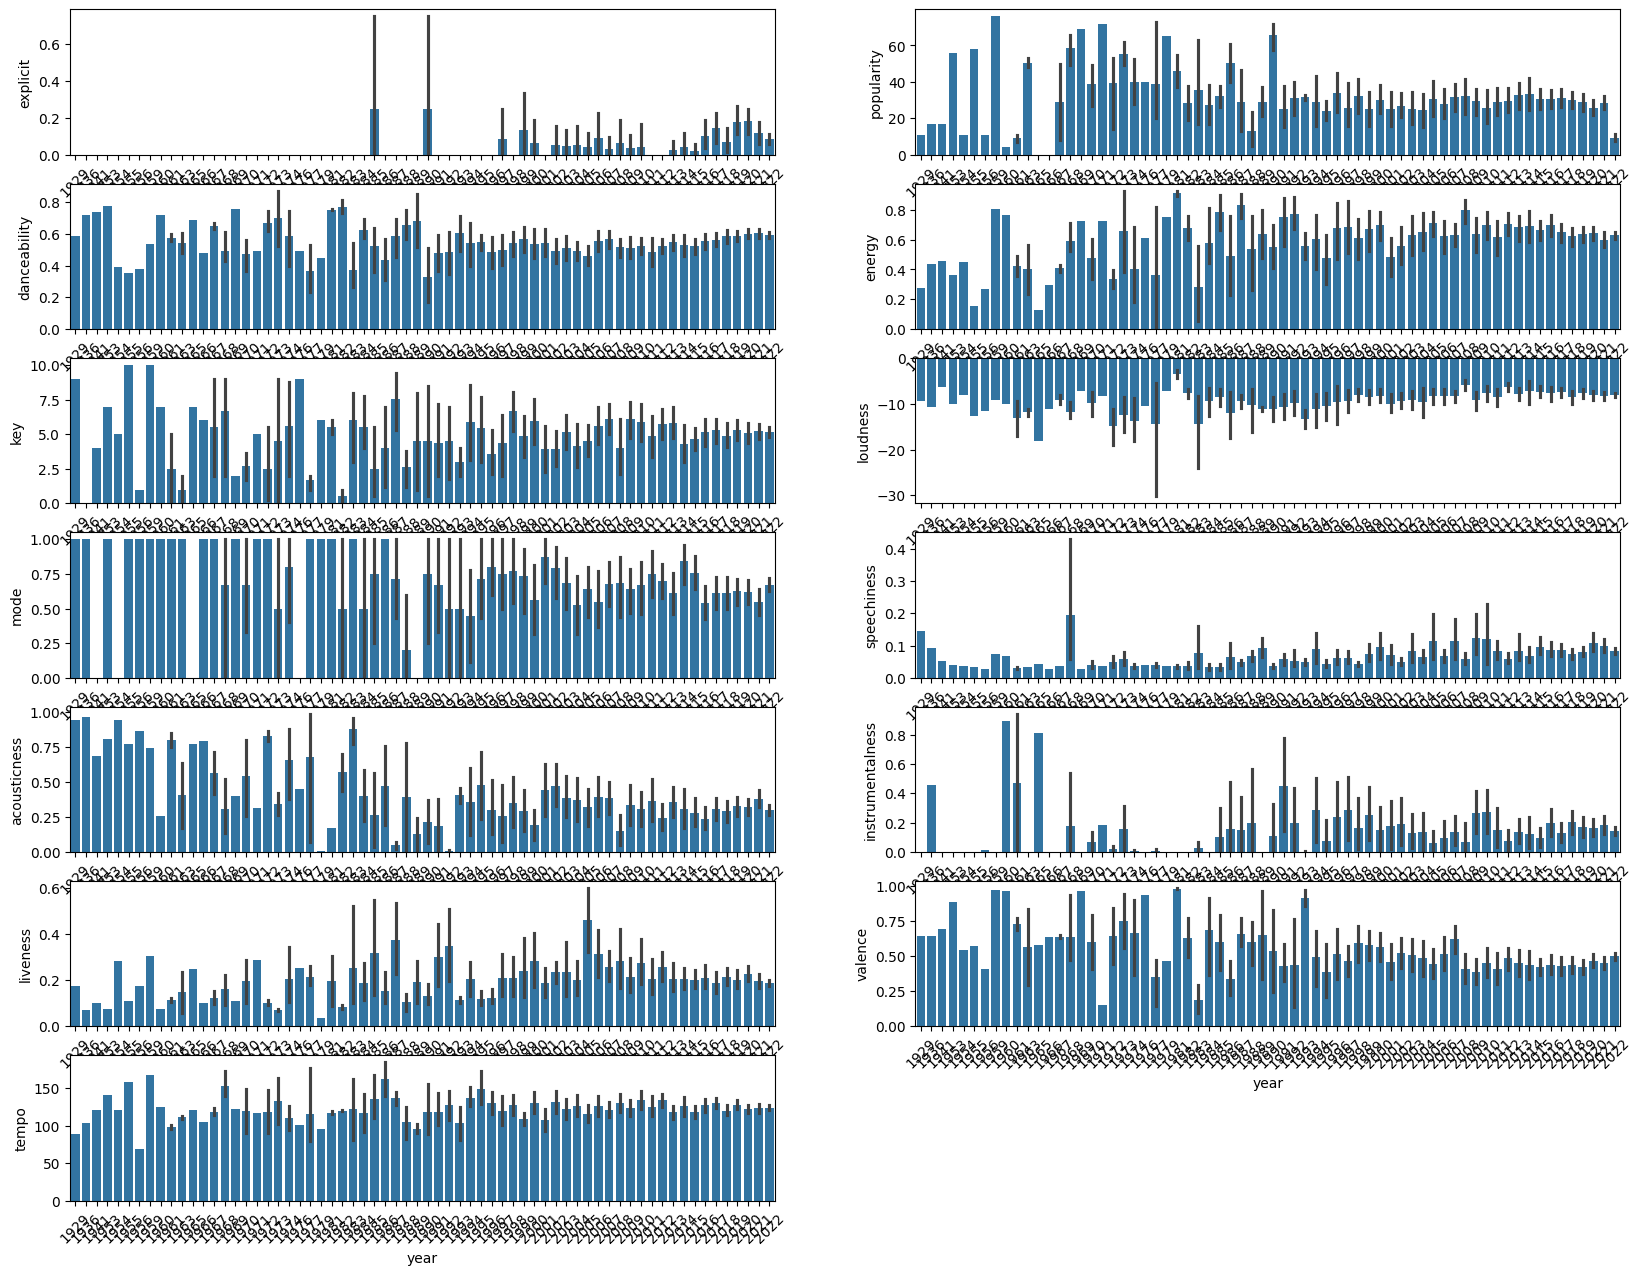

In [12]:
visual_data = music_data.drop(columns=['track_id', 'imageURL','song', 'artist', 'year', 'genre'])

plt.figure(figsize=(20, 20))
for i in tqdm(np.arange(1, len(visual_data.columns))):
    plt.subplot(9, 2, i)
    sb.barplot(x=music_data.year,y=visual_data[visual_data.columns[i]])
    plt.xticks(rotation=45);
plt.show()

# Heat map

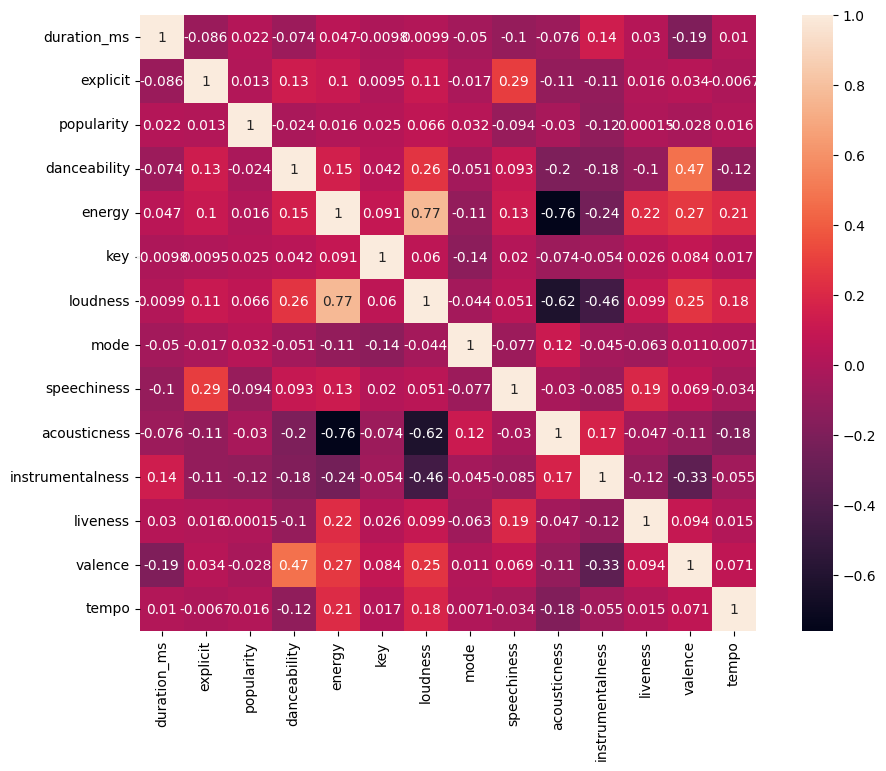

In [13]:
plt.subplots(figsize=(12, 8))
sb.heatmap(visual_data.corr(), annot=True, square=True)
plt.show()

# ENCODING THE MUSIC GENRE COLUMN

In [14]:
from sklearn.preprocessing import OneHotEncoder
unique_genres = set()
for genre_list in music_data["genre"]:
    genres = genre_list.split(",")
    for genre in genres:
        unique_genres.add(genre)

# Create a one-hot encoding for the genre column
encoder = OneHotEncoder()
encoder.fit([[genre] for genre in unique_genres])

# Encode the genre data
encoded_genres = []
for genres in music_data["genre"]:
    genres = genres.split(",")
    one_hot = [0 if genre not in genres else 1 for genre in unique_genres]
    encoded_genres.append(one_hot)

# Normalizing the columns

In [15]:
import os
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings("ignore")

In [16]:
def normalize_column(col):
    max_d = music_data[col].max()
    min_d = music_data[col].min()
    music_data[col] = (music_data[col] - min_d)/(max_d - min_d)

In [17]:
num_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num = music_data.select_dtypes(include=num_types)

for col in num.columns:
    if col != 'year':
        normalize_column(col)

# Boxplot visualization to identify outliers

<Axes: >

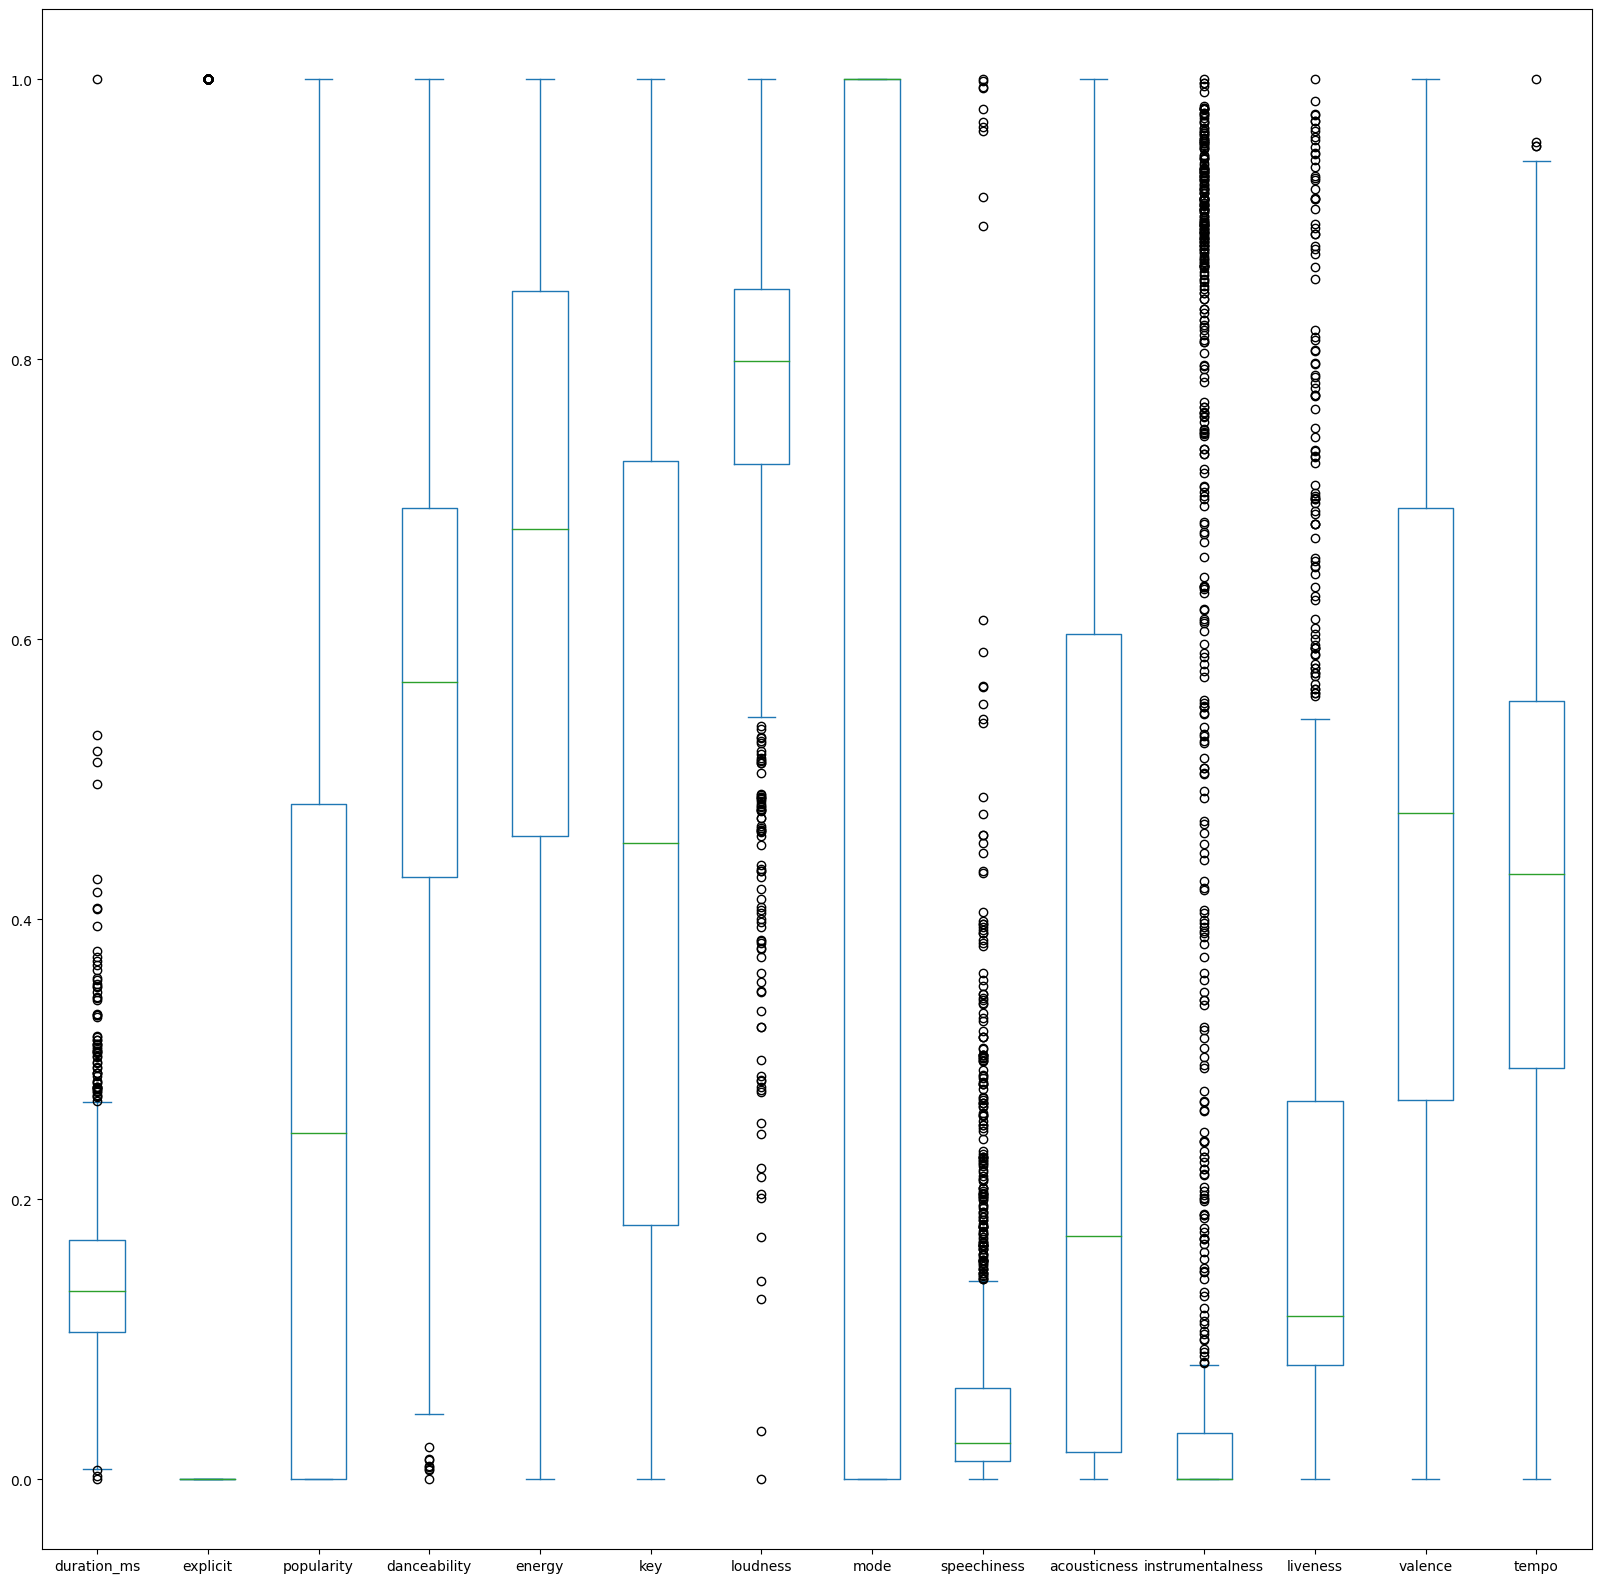

In [18]:
music_data.select_dtypes(np.number).drop(columns = ['year']).plot(kind='box' ,figsize=(20, 20) ,fontsize=10)

# Scatterplot visualization to see patterns of interest

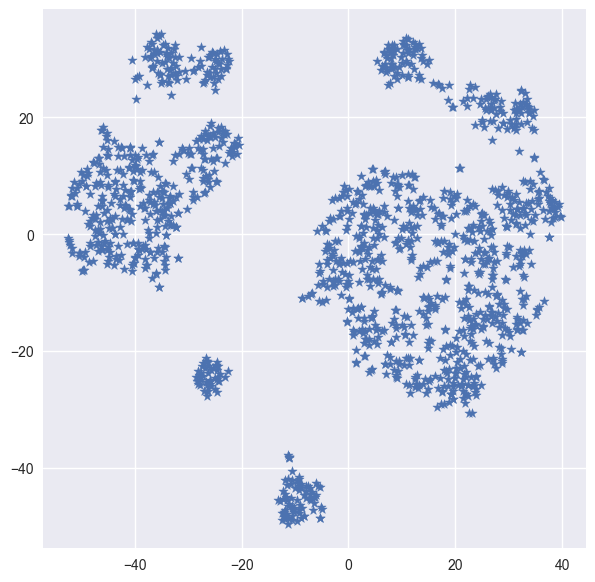

In [19]:
model = TSNE(n_components = 2, random_state = 0)
music_data_modified = music_data.select_dtypes(np.number).drop(columns=['year'])
tsne_data = model.fit_transform(music_data_modified)
plt.style.use('seaborn')
plt.figure(figsize = (7, 7))
plt.scatter(tsne_data[:,0], tsne_data[:,1],  marker= '*')
plt.show()

# JOINING THE ENCODED GENRE COLUMNS WITH THE ORIGINAL DATASET

In [20]:
encoded_genres_df = pd.DataFrame(encoded_genres)

encoded_genres_df.columns = unique_genres
encoded_genres_df

,folk,opera,tango,reggae,happy,minimal-techno,synth-pop,chicago-house,black-metal,comedy,...,salsa,hard-rock,children,piano,trip-hop,grunge,edm,power-pop,deep-house,mandopop
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1491,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1492,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1493,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:


# Concatenate the encoded genres DataFrame with the original dataset
music_data = pd.concat([music_data, encoded_genres_df], axis=1)

# View the dataset with the encoded genres
music_data.head()

,track_id,artist,song,duration_ms,explicit,year,imageURL,popularity,danceability,energy,...,salsa,hard-rock,children,piano,trip-hop,grunge,edm,power-pop,deep-house,mandopop
0,1JiR4RJaZlbZ5b3HG8jkeL,Wizkid,Longtime (feat. Skepta),0.155794,1.0,2020,https://i.scdn.co/image/ab67616d0000b27390e89e...,0.600000,0.872412,0.659561,...,0,0,0,0,0,0,0,0,0,0
1,6cfNBFSKFB59wO8xIFZ0qI,Ivan komarenko,Dom na wiślanym brzegu,0.132528,0.0,2010,https://i.scdn.co/image/ab67616d0000b273bd89a9...,0.176471,0.637381,0.757687,...,0,0,0,0,0,0,0,0,0,0
2,5VcFzH97JEHgXgedErp4cP,Jayla Darden,Idea 686,0.097887,0.0,2018,https://i.scdn.co/image/ab67616d0000b2738a4b10...,0.647059,0.717963,0.346157,...,0,0,0,0,0,0,0,0,0,0
3,7oMBY3VmIxqNVeZ7yneYuN,Various Artists,Me Voy Enamorando,0.152642,0.0,2022,https://i.scdn.co/image/ab67616d0000b27358067d...,0.000000,0.688864,0.911886,...,0,0,0,0,0,0,0,0,0,0
4,3eDX2SnjVRG9hh0v074eEO,Various Artists,Christmas Without You,0.123503,0.0,2022,https://i.scdn.co/image/ab67616d0000b27389f796...,0.000000,0.214326,0.676583,...,0,0,0,1,0,0,0,0,0,0


# importing the KMeans clustering algorithm that is used to generate categories from music relations

In [22]:
import pickle

In [23]:
num

,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,239893,1,2020,51,0.850,0.660,11,-4.846,0,0.1690,0.41700,0.000051,0.2090,0.622,101.947
1,209093,0,2010,15,0.640,0.758,9,-7.310,0,0.0675,0.49700,0.000000,0.0506,0.849,106.978
2,163235,0,2018,55,0.712,0.347,0,-10.363,0,0.0410,0.37800,0.021200,0.1110,0.500,135.975
3,235720,0,2022,0,0.686,0.912,10,-3.411,1,0.0685,0.05330,0.000000,0.3920,0.511,99.952
4,197146,0,2022,0,0.262,0.677,7,-5.645,1,0.0528,0.44700,0.000000,0.2050,0.365,207.478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,691186,0,2009,31,0.652,0.478,7,-7.663,1,0.0553,0.96200,0.000024,0.7030,0.830,113.691
1491,364853,0,2022,0,0.591,0.569,9,-12.680,0,0.0468,0.39700,0.011100,0.1750,0.495,135.980
1492,151826,0,2022,0,0.587,0.876,4,-5.614,1,0.0684,0.24500,0.000000,0.3310,0.891,154.862
1493,151308,1,2018,50,0.728,0.573,6,-8.388,1,0.0347,0.00732,0.000000,0.1640,0.316,139.944


In [24]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=10)
cat = km.fit_predict(num)
pickle.dump(km , open('knn_model.pk1' , 'wb'))
music_data['cat'] = cat
normalize_column('cat')

In [25]:
music_data.cat[:10]

0    0.000000
1    0.000000
2    0.222222
3    0.000000
4    0.555556
5    1.000000
6    0.000000
7    0.333333
8    0.222222
9    0.555556
Name: cat, dtype: float64

In [27]:
cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=10))])
X = music_data.select_dtypes(np.number)
cluster_pipeline.fit(X)
pickle.dump(km , open('cluster_model.pk1' , 'wb'))
music_data['cluster'] = cluster_pipeline.predict(X)

# Visualizing the Clusters with t-SNE

In [28]:
tsne_pipeline = Pipeline([('scaler', StandardScaler()), ('tsne', TSNE(n_components=2, verbose=1))])
genre_embedding = tsne_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
projection['genres'] = music_data['genre']
projection['cluster'] = music_data['cluster']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'genres'])
fig.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1495 samples in 0.001s...
[t-SNE] Computed neighbors for 1495 samples in 0.021s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1495
[t-SNE] Computed conditional probabilities for sample 1495 / 1495
[t-SNE] Mean sigma: 6.068234
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.768051
[t-SNE] KL divergence after 1000 iterations: 0.461087


# Splitting the data into train, test and validation sets

In [29]:
music_data['cluster']

0       9
1       1
2       3
3       1
4       1
       ..
1490    3
1491    1
1492    1
1493    9
1494    9
Name: cluster, Length: 1495, dtype: int32

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X = music_data.select_dtypes(np.number).drop(columns = ['cat','cluster','year']).copy()
y = music_data['cluster']

In [32]:
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8, random_state=0)

X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

print('X_train= ',X_train.shape), print('y_train= ', y_train.shape)
print('x_train= ',X_valid.shape), print('y_valid= ',y_valid.shape)
print('x_test=  ',X_test.shape), print('y_test=  ',y_test.shape)

X_train=  (1196, 127)
y_train=  (1196,)
x_train=  (149, 127)
y_valid=  (149,)
x_test=   (150, 127)
y_test=   (150,)


(None, None)

# using various values of K we shall train our model

In [33]:
knn1= KNeighborsClassifier(metric='cosine', algorithm='brute', n_neighbors=1)
knn5= KNeighborsClassifier(metric='cosine', algorithm='brute', n_neighbors=5)
knn10= KNeighborsClassifier(metric='cosine', algorithm='brute', n_neighbors=10)

# fitted with both the training and validation data then training data again to learn different patterns and prevent bias

In [34]:
model_knn5 = knn5.fit(X_train, y_train)
pickle.dump(model_knn5 , open('knn5Model.pk1' , 'wb'))
knn1.fit(X_train, y_train)
knn10.fit(X_train, y_train)

knn5.fit(X_valid, y_valid)
knn1.fit(X_valid, y_valid)
knn10.fit(X_valid, y_valid)

knn5.fit(X_train, y_train)
knn1.fit(X_train, y_train)
knn10.fit(X_train, y_train)

y_pred_5 = knn5.predict(X_valid)
y_pred_1 = knn1.predict(X_valid)
y_pred_10 = knn1.predict(X_valid)

In [35]:
X_valid

,duration_ms,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,...,salsa,hard-rock,children,piano,trip-hop,grunge,edm,power-pop,deep-house,mandopop
799,0.218347,0.0,0.188235,0.685506,0.535401,0.363636,0.766409,0.0,0.024768,0.115462,...,0,0,0,0,0,0,0,0,0,0
1359,0.126223,0.0,0.494118,0.582541,0.838792,0.090909,0.868233,0.0,0.019537,0.009588,...,0,0,0,0,0,0,0,0,0,0
776,0.175092,1.0,0.517647,0.116956,0.944929,0.545455,0.859248,1.0,0.063948,0.000227,...,0,0,0,0,0,0,0,0,0,0
1396,0.157486,0.0,0.529412,0.120313,0.208980,0.454545,0.482341,1.0,0.007793,0.956827,...,0,0,0,0,0,0,0,0,0,0
1170,0.116564,0.0,0.341176,0.645215,0.389212,0.181818,0.692461,1.0,0.012811,0.807229,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,0.044075,0.0,0.000000,0.524342,0.156912,0.909091,0.587650,1.0,0.013131,0.979920,...,0,0,0,0,0,0,0,0,0,0
740,0.085642,0.0,0.247059,0.775042,0.471318,0.636364,0.769644,1.0,0.020925,0.502008,...,0,0,0,0,0,0,0,0,0,0
602,0.131324,0.0,0.317647,0.723559,0.489341,0.727273,0.841377,1.0,0.004697,0.853414,...,0,0,0,0,0,0,0,0,0,1
2,0.097887,0.0,0.647059,0.717963,0.346157,0.000000,0.716604,0.0,0.018896,0.379518,...,0,0,0,0,0,0,0,0,0,0


In [36]:
y_pred_5

array([9, 9, 9, 4, 3, 3, 4, 1, 1, 3, 9, 1, 3, 6, 1, 3, 9, 3, 3, 1, 1, 4,
       4, 1, 3, 1, 8, 1, 1, 1, 1, 9, 1, 9, 3, 9, 1, 3, 9, 9, 1, 1, 8, 1,
       3, 1, 9, 1, 8, 3, 1, 3, 4, 1, 1, 1, 1, 3, 9, 1, 1, 9, 3, 9, 3, 9,
       1, 1, 1, 5, 1, 1, 4, 1, 3, 4, 1, 1, 4, 1, 1, 0, 3, 1, 3, 1, 9, 9,
       1, 7, 3, 4, 1, 1, 3, 1, 4, 1, 3, 3, 1, 1, 3, 1, 1, 3, 1, 9, 1, 1,
       1, 4, 3, 1, 8, 1, 1, 1, 3, 1, 9, 4, 3, 9, 9, 3, 9, 3, 1, 3, 3, 1,
       1, 1, 9, 1, 1, 1, 3, 1, 3, 1, 1, 3, 4, 1, 3, 1, 1], dtype=int32)

# accuracy score

In [37]:
from sklearn.metrics import accuracy_score
print("Accuracy with k=5", accuracy_score(y_valid, y_pred_5)*100)
print("Accuracy with k=1", accuracy_score(y_valid, y_pred_1)*100)
print("Accuracy with k=10", accuracy_score(y_valid, y_pred_10)*100)

Accuracy with k=5 83.22147651006712
Accuracy with k=1 85.23489932885906
Accuracy with k=10 85.23489932885906


# confusion matrix

In [38]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_valid, y_pred_1))
print(confusion_matrix(y_valid, y_pred_5))
print(confusion_matrix(y_valid, y_pred_10))

[[ 1  0  0  0  0  0  0  0  0]
 [ 0 57  3  2  0  0  0  0  1]
 [ 0  8 33  0  0  0  0  0  1]
 [ 0  1  0 10  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  1  0  0]
 [ 0  1  0  0  0  0  0  4  0]
 [ 0  5  0  0  0  0  0  0 19]]
[[ 1  0  0  0  0  0  0  0  0]
 [ 0 55  4  2  0  0  0  0  2]
 [ 0  9 31  0  0  0  0  0  2]
 [ 0  0  0 11  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  1  0  0]
 [ 0  0  1  0  0  0  0  4  0]
 [ 0  5  0  0  0  0  0  0 19]]
[[ 1  0  0  0  0  0  0  0  0]
 [ 0 57  3  2  0  0  0  0  1]
 [ 0  8 33  0  0  0  0  0  1]
 [ 0  1  0 10  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  1  0  0]
 [ 0  1  0  0  0  0  0  4  0]
 [ 0  5  0  0  0  0  0  0 19]]


# Classification report

In [39]:
print(classification_report(y_valid, y_pred_1))
print(classification_report(y_valid, y_pred_5))
print(classification_report(y_valid, y_pred_10))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.79      0.90      0.84        63
           3       0.92      0.79      0.85        42
           4       0.83      0.91      0.87        11
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      0.80      0.89         5
           9       0.90      0.79      0.84        24

    accuracy                           0.85       149
   macro avg       0.94      0.91      0.92       149
weighted avg       0.86      0.85      0.85       149

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.80      0.87      0.83        63
           3       0.86      0.74      0.79        42
           4       0.85      1.00      0.92        11
           5       1.00 

# Visualizing the prediction

In [40]:
tsne_model = TSNE(n_components = 2, random_state = 0)
tsne_data_X_valid = tsne_model.fit_transform(X_test)

ValueError: 'c' argument has 149 elements, which is inconsistent with 'x' and 'y' with size 150.

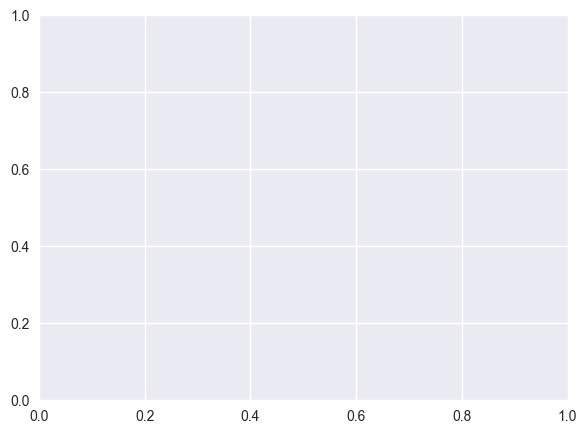

In [41]:
cmap = sb.cubehelix_palette(as_cmap=True)
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.scatter(tsne_data_X_valid[:,0], tsne_data_X_valid[:,1], c=y_pred_5, marker= '*', s=100, cmap=cmap)
plt.title("Predicted values with k=5", fontsize=20)
plt.subplot(1,2,2)
plt.scatter(tsne_data_X_valid[:,0], tsne_data_X_valid[:,1], c=y_pred_1, marker= '*', s=100, cmap=cmap)
plt.title("Predicted values with k=1", fontsize=20)
plt.show()
plt.subplot(1,2,2)
plt.scatter(tsne_data_X_valid[:,0], tsne_data_X_valid[:,1], c=y_pred_10, marker= '*', s=100, cmap=cmap)
plt.title("Predicted values with k=10", fontsize=20)
plt.show()

# Creating a recommendation machine

In [42]:
!python -m pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org fuzzywuzzy

In [43]:
from fuzzywuzzy import process
X_test

,duration_ms,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,...,salsa,hard-rock,children,piano,trip-hop,grunge,edm,power-pop,deep-house,mandopop
309,0.297725,0.0,0.552941,0.551203,0.802746,0.454545,0.808995,0.0,0.100032,0.591365,...,0,0,0,0,0,0,0,0,0,0
362,0.077738,0.0,0.670588,0.763850,0.538405,0.272727,0.801653,1.0,0.017081,0.050703,...,0,0,0,0,0,0,0,0,0,0
930,0.144931,0.0,0.164706,0.471740,0.319122,0.181818,0.678075,1.0,0.018576,0.804217,...,0,0,0,0,0,0,0,0,0,0
1036,0.076383,0.0,0.188235,0.909345,0.627520,1.000000,0.756677,1.0,0.085086,0.159639,...,0,0,0,0,0,0,0,0,0,0
47,0.108366,0.0,0.000000,0.418019,0.668572,0.727273,0.807104,0.0,0.108573,0.067169,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,0.240858,0.0,0.105882,0.532177,0.831783,0.909091,0.754661,1.0,0.014839,0.001456,...,0,0,0,0,0,0,0,0,0,0
539,0.185815,0.0,0.752941,0.799664,0.699613,0.818182,0.829928,0.0,0.018469,0.017972,...,0,0,0,0,0,0,0,0,0,0
223,0.151715,0.0,0.588235,0.186346,0.435272,0.636364,0.679717,1.0,0.008754,0.251004,...,0,0,0,0,0,0,0,0,0,0
303,0.134240,0.0,0.411765,0.623951,0.748676,0.090909,0.846380,1.0,0.024020,0.000765,...,0,0,0,0,0,0,0,0,1,0


In [44]:
X_test.shape

(150, 127)

In [45]:
recommendation_set = music_data.merge(X_test, how = 'inner' ,indicator=False)
recommendation_set

,track_id,artist,song,duration_ms,explicit,year,imageURL,popularity,danceability,energy,...,children,piano,trip-hop,grunge,edm,power-pop,deep-house,mandopop,cat,cluster
0,196ZNihAwp7y7Ao4YfSdIx,Kid Abelha,Educação sentimental II,0.195085,0.0,1985,https://i.scdn.co/image/ab67616d0000b273aaf64c...,0.470588,0.658646,0.711628,...,0,0,0,0,0,0,0,0,1.000000,1
1,3hboOw4dS0aXGuP0fyyvbC,Tenille Arts,Somebody Like That,0.124305,0.0,2020,https://i.scdn.co/image/ab67616d0000b273249836...,0.011765,0.563514,0.797739,...,0,0,0,0,0,0,0,0,0.555556,1
2,4BMHp3DkI8VLsuB9Kr0pzu,Ludovico Einaudi,Primavera,0.308768,0.0,2006,https://i.scdn.co/image/ab67616d0000b273f58c2d...,0.717647,0.179631,0.204974,...,0,0,0,0,0,0,0,0,0.777778,4
3,4TNbuAW9vMe1iz5hbimlY7,Palavra Cantada,Caranguejo / O Cravo e a Rosa,0.077041,0.0,1998,https://i.scdn.co/image/ab67616d0000b2731ee962...,0.482353,0.777280,0.344154,...,0,0,0,0,0,0,0,0,0.222222,3
4,2dz2ynnOWIWA4V1orUtwIu,Various Artists,Good Life,0.159481,0.0,2022,https://i.scdn.co/image/ab67616d0000b273e7c666...,0.000000,0.722440,0.782720,...,0,0,0,0,0,0,0,0,0.444444,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,6wbbbTyX0vqVN85ZwiRIm3,Burgerkill,Atur Aku,0.181468,1.0,2006,https://i.scdn.co/image/ab67616d0000b273ed9225...,0.423529,0.438165,0.979974,...,0,0,0,0,0,0,0,0,0.444444,5
153,3lyLqIn8mybyEFTs8JJaLf,Michael Bublé,Home,0.145228,0.0,2005,https://i.scdn.co/image/ab67616d0000b273c6ad2b...,0.800000,0.601567,0.369186,...,0,0,0,0,0,0,0,0,0.000000,3
154,3eV4Nn0Nlr3HbKqIlBArF4,Celtic Thunder,Falling Slowly,0.151343,0.0,2012,https://i.scdn.co/image/ab67616d0000b2730826a2...,0.188235,0.465025,0.387210,...,0,0,0,0,0,0,0,0,0.000000,8
155,0VwzEoaTzrA4zjaRIkXpbh,Abin Fang,壞人,0.201269,0.0,2018,https://i.scdn.co/image/ab67616d0000b27359e735...,0.611765,0.438165,0.515375,...,0,0,0,0,0,0,0,1,1.000000,3


In [46]:
def recommender(song_name, data,model):
    idx=process.extractOne(song_name, recommendation_set['song'])[2]
    print('Song Selected:-',recommendation_set['song'][idx], 'Index: ',idx)
    print('Searching for recommendations.....')
    requiredSongs = recommendation_set.select_dtypes(np.number).drop(columns = ['cat','cluster','year']).copy()
    distances, indices = model.kneighbors(requiredSongs.iloc[idx].values.reshape(1,-1))
    for i in indices:
        print(music_data['song'][i] + "      " + music_data['artist'][i])


In [47]:
def get_song_info(row_number):
    song_info = recommendation_set.loc[row_number, ["song", "artist"]]
    return song_info

song_info = get_song_info(1)
print("Song name: ", song_info[0])
print("Artist name: ", song_info[1])

Song name:  Somebody Like That
Artist name:  Tenille Arts


In [48]:
recommendation_set.to_csv('recommendation_set.csv')

In [49]:
import pickle
knn5Model = pickle.load(open('/Users/thinhpham/Learning/Master/HK_IV/IS/BTL/Music-Recommendation-using-Kmeans-KNN/knn5Model.pk1' , 'rb'))

song_name = song_info[0]
recommender(song_name,X_test, knn5Model)

Song Selected:- Somebody Like That Index:  1
Searching for recommendations.....
593     Lubię jeansy - Radio Edit      Veegas
526              Screwed      Various Artists
987             Kool Kids      Kids Rap Radio
1083                      MAMIII      Becky G
869                  She Burns      Foy Vance
dtype: object
